In [2]:
import sionna.rt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import drjit as dr

from sionna.rt import load_scene, PlanarArray, Transmitter, Receiver, Camera,\
                      PathSolver, RadioMapSolver, subcarrier_frequencies

using_preview = True

In [3]:
current_scene = load_scene()

current_scene.frequency = 3e9
current_scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1, 
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="tr38901",
                             polarization="V")

tx = Transmitter(name="1", position=[0,0,5], display_radius=1, power_dbm=80)
current_scene.add(tx)


rm_solver = RadioMapSolver()
rm = rm_solver(current_scene,
               max_depth=30,           # Maximum number of ray scene interactions
               samples_per_tx=10**7 , # If you increase: less noise, but more memory required
               cell_size=(5, 5),      # Resolution of the radio map
               center=[0, 0, 0],      # Center of the radio map
               size=[1000, 1000],       # Total size of the radio map
               orientation=[0, 0, 0]) # Orientation of the radio map, e.g., could be also vertical


#Solves for the radio map and shows its output
def solve_radio_map():
    global rm
    rm = rm_solver(current_scene,
               max_depth=30,           # Maximum number of ray scene interactions
               samples_per_tx=10**7 , # If you increase: less noise, but more memory required
               cell_size=(5, 5),      # Resolution of the radio map
               center=[0, 0, 0],      # Center of the radio map
               size=[1000, 1000],       # Total size of the radio map
               orientation=[0, 0, 0]) # Orientation of the radio map, e.g., could be also vertical
    
    
    


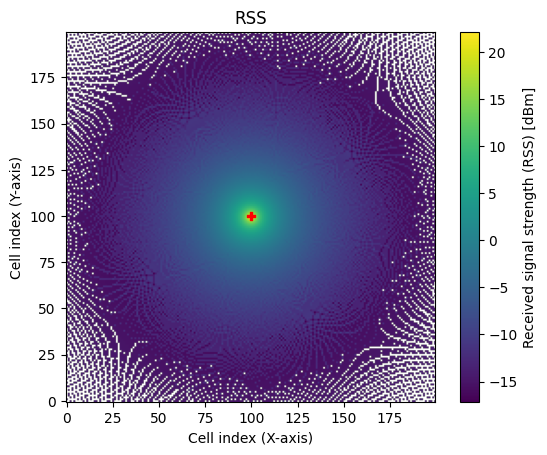

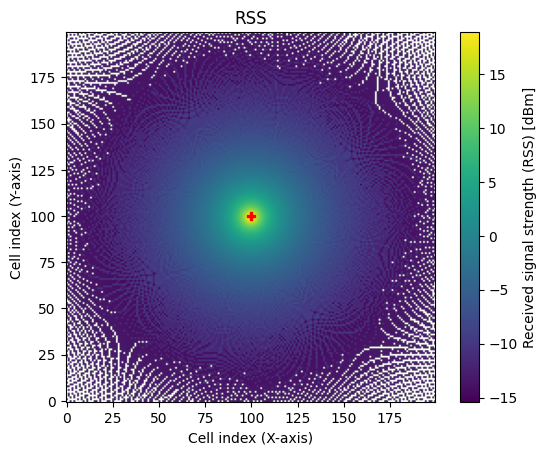

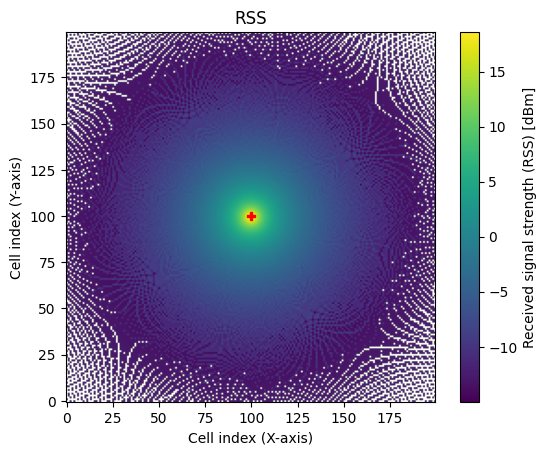

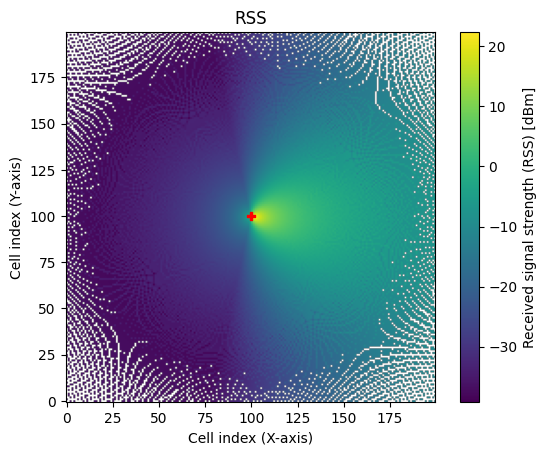

In [4]:
current_scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1, 
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="iso",
                             polarization="V")
#current_scene.tx_array.antenna_pattern.show()

solve_radio_map()
rm.show(metric="rss");

current_scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1, 
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="dipole",
                             polarization="V")
#current_scene.tx_array.antenna_pattern.show()

solve_radio_map()
rm.show(metric="rss");

current_scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1, 
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="hw_dipole",
                             polarization="V")
#current_scene.tx_array.antenna_pattern.show()

solve_radio_map()
rm.show(metric="rss");

current_scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1, 
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="tr38901",
                             polarization="V")
#current_scene.tx_array.antenna_pattern.show()

solve_radio_map()
rm.show(metric="rss");




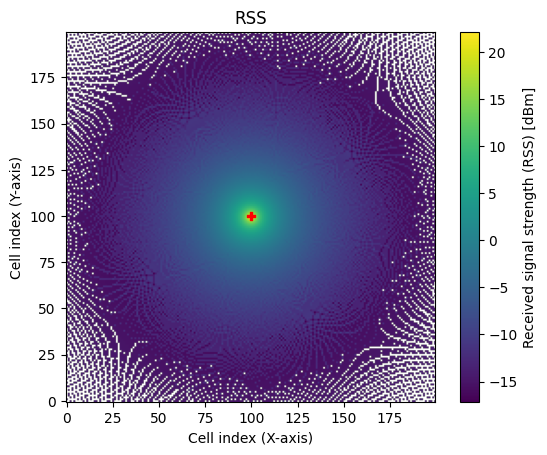

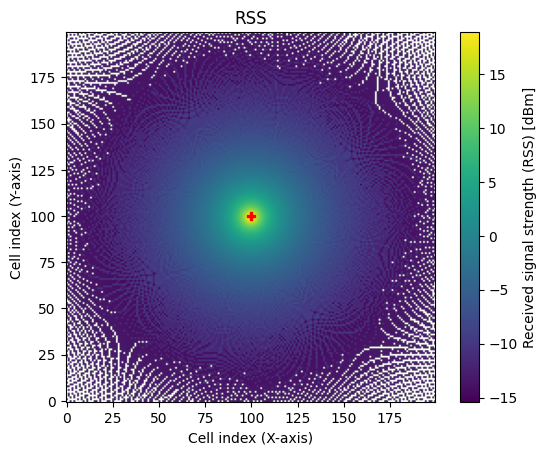

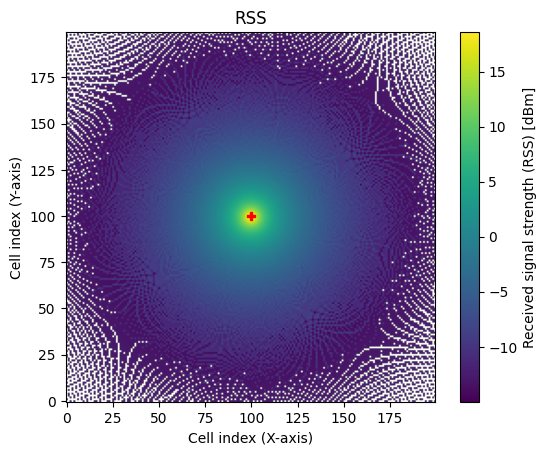

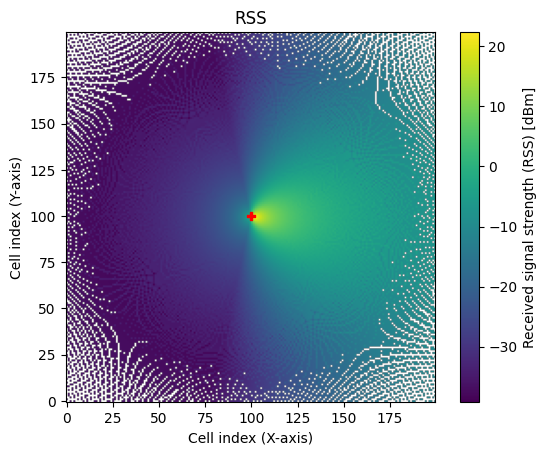

In [5]:
current_scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1, 
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="iso",
                             polarization="VH")
#current_scene.tx_array.antenna_pattern.show()

solve_radio_map()
rm.show(metric="rss");

current_scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1, 
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="dipole",
                             polarization="VH")
#current_scene.tx_array.antenna_pattern.show()

solve_radio_map()
rm.show(metric="rss");

current_scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1, 
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="hw_dipole",
                             polarization="VH")
#current_scene.tx_array.antenna_pattern.show()

solve_radio_map()
rm.show(metric="rss");

current_scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1, 
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="tr38901",
                             polarization="VH")
#current_scene.tx_array.antenna_pattern.show()

solve_radio_map()
rm.show(metric="rss");

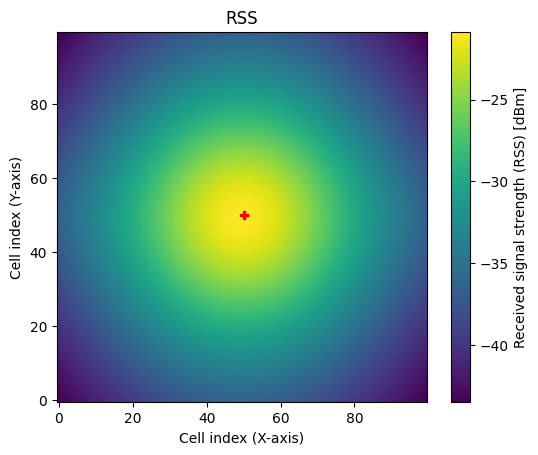

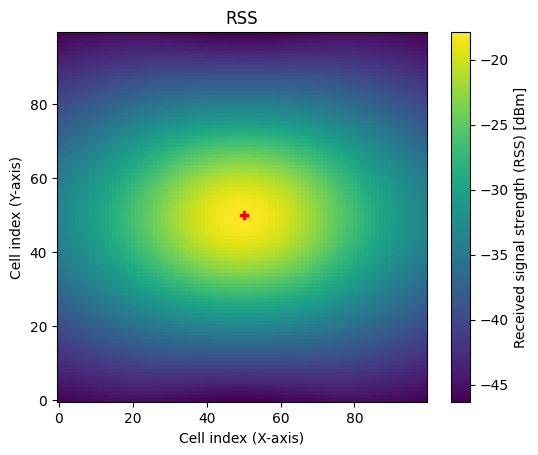

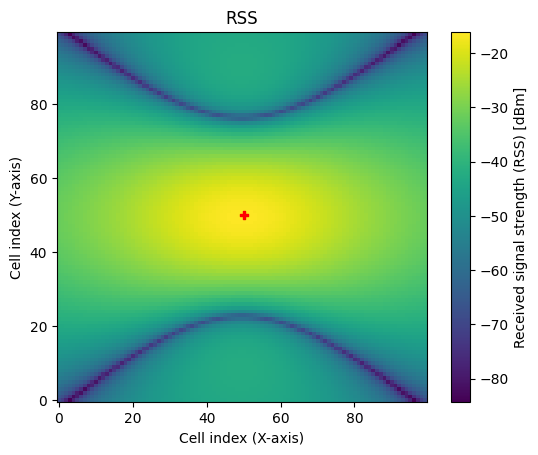

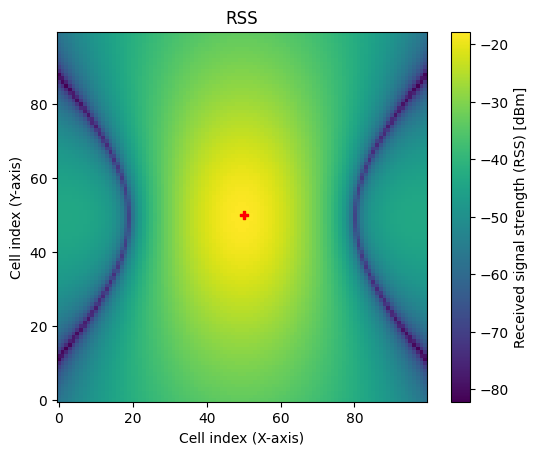

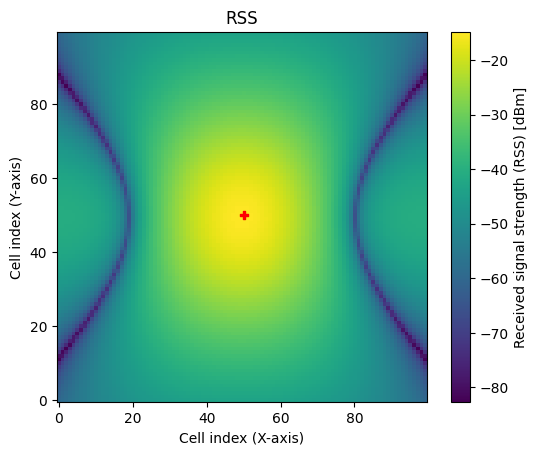

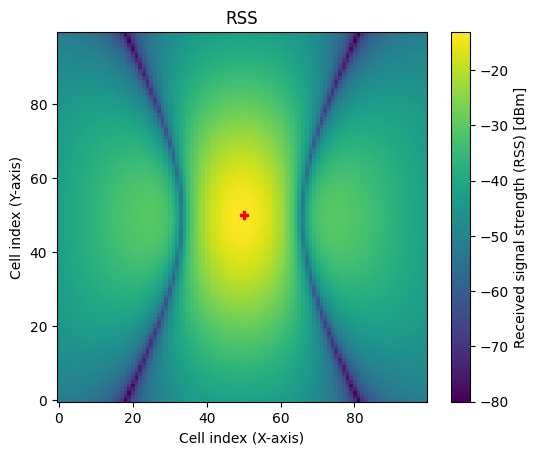

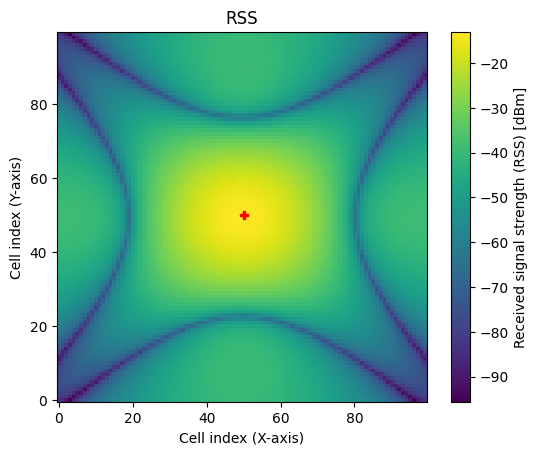

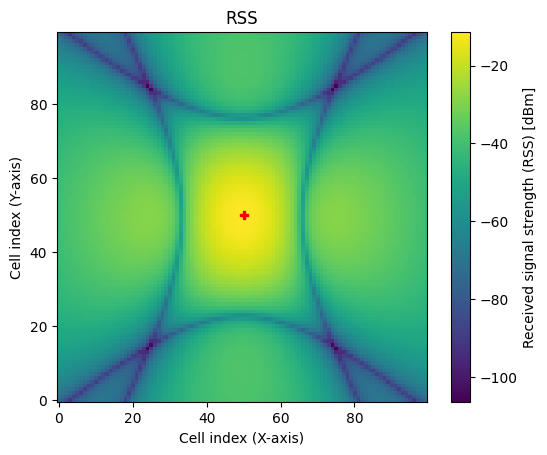

In [6]:
import sionna
from sionna.rt import load_scene, PlanarArray, Transmitter, RadioMapSolver

scene = load_scene()
#scene.radio_materials["marble"].thickness = 0.5

# Configure antenna array for all transmitters
scene.tx_array = PlanarArray(num_rows=8,
                        num_cols=8,
                        vertical_spacing=0.7,
                        horizontal_spacing=0.5,
                        pattern="tr38901",
                        polarization="VH")

# Add a transmitters
tx = Transmitter(name="tx",
            position=[0,0,30],
            orientation=[0,0,0])

scene.add(tx)

solver = RadioMapSolver()
tx.look_at([0,0,0])


scene.tx_array = PlanarArray(num_rows=1,
                        num_cols=1,
                        vertical_spacing=0.7,
                        horizontal_spacing=0.5,
                        pattern="tr38901",
                        polarization="VH")
rm = solver(scene, size=[100,100], cell_size=(1., 1.), samples_per_tx=100000000, center=[0,0,0], orientation=[0,0,0])
rm.show(metric="rss");

scene.tx_array = PlanarArray(num_rows=1,
                        num_cols=2,
                        vertical_spacing=0.7,
                        horizontal_spacing=0.5,
                        pattern="tr38901",
                        polarization="VH")
rm = solver(scene, size=[100,100], cell_size=(1., 1.), samples_per_tx=100000000, center=[0,0,0], orientation=[0,0,0])
rm.show(metric="rss");

scene.tx_array = PlanarArray(num_rows=1,
                        num_cols=3,
                        vertical_spacing=0.7,
                        horizontal_spacing=0.5,
                        pattern="tr38901",
                        polarization="VH")
rm = solver(scene, size=[100,100], cell_size=(1., 1.), samples_per_tx=100000000, center=[0,0,0], orientation=[0,0,0])
rm.show(metric="rss");

scene.tx_array = PlanarArray(num_rows=2,
                        num_cols=1,
                        vertical_spacing=0.7,
                        horizontal_spacing=0.5,
                        pattern="tr38901",
                        polarization="VH")
rm = solver(scene, size=[100,100], cell_size=(1., 1.), samples_per_tx=100000000, center=[0,0,0], orientation=[0,0,0])
rm.show(metric="rss");

scene.tx_array = PlanarArray(num_rows=2,
                        num_cols=2,
                        vertical_spacing=0.7,
                        horizontal_spacing=0.5,
                        pattern="tr38901",
                        polarization="VH")
rm = solver(scene, size=[100,100], cell_size=(1., 1.), samples_per_tx=100000000, center=[0,0,0], orientation=[0,0,0])
rm.show(metric="rss");

scene.tx_array = PlanarArray(num_rows=3,
                        num_cols=2,
                        vertical_spacing=0.7,
                        horizontal_spacing=0.5,
                        pattern="tr38901",
                        polarization="VH")
rm = solver(scene, size=[100,100], cell_size=(1., 1.), samples_per_tx=100000000, center=[0,0,0], orientation=[0,0,0])
rm.show(metric="rss");

scene.tx_array = PlanarArray(num_rows=2,
                        num_cols=3,
                        vertical_spacing=0.7,
                        horizontal_spacing=0.5,
                        pattern="tr38901",
                        polarization="VH")
rm = solver(scene, size=[100,100], cell_size=(1., 1.), samples_per_tx=100000000, center=[0,0,0], orientation=[0,0,0])
rm.show(metric="rss");

scene.tx_array = PlanarArray(num_rows=3,
                        num_cols=3,
                        vertical_spacing=0.7,
                        horizontal_spacing=0.5,
                        pattern="tr38901",
                        polarization="VH")
rm = solver(scene, size=[100,100], cell_size=(1., 1.), samples_per_tx=100000000, center=[0,0,0], orientation=[0,0,0])
rm.show(metric="rss");

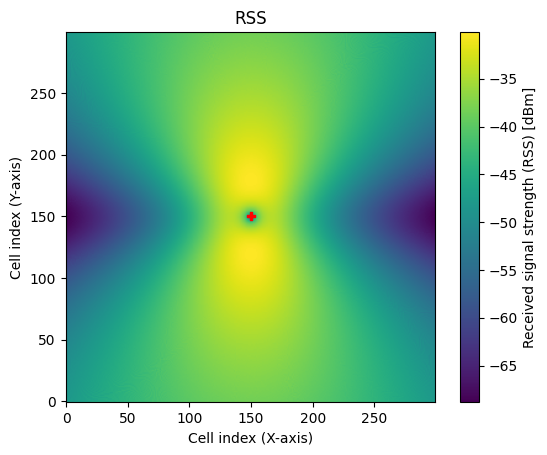

In [15]:
scene.tx_array = PlanarArray(num_rows=1,
                        num_cols=2,
                        vertical_spacing=0.7,
                        horizontal_spacing=0.5,
                        pattern="dipole",
                        polarization="VH")
scene.get("tx").look_at([0, 1, 30])

rm = solver(scene, size=[300,300], cell_size=(1., 1.), samples_per_tx=100000000, center=[0,0,0], orientation=[0,0,0])
rm.show(metric="rss");

scene.preview(radio_map=rm);